In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

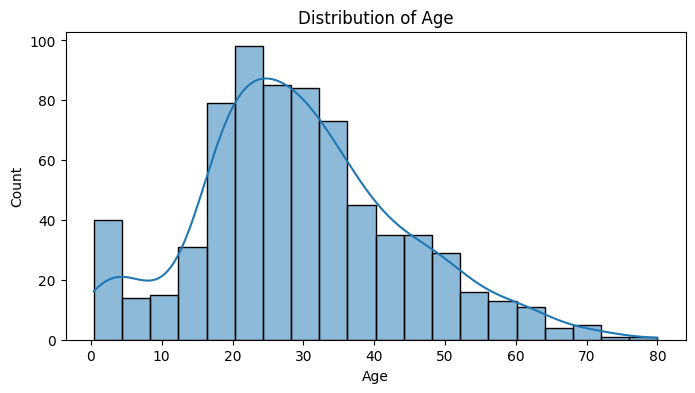

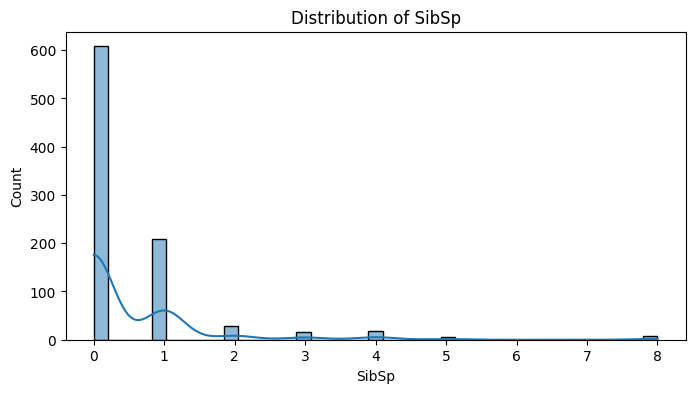

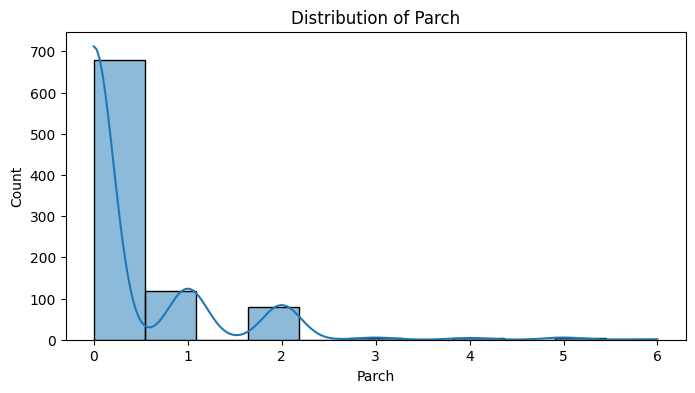

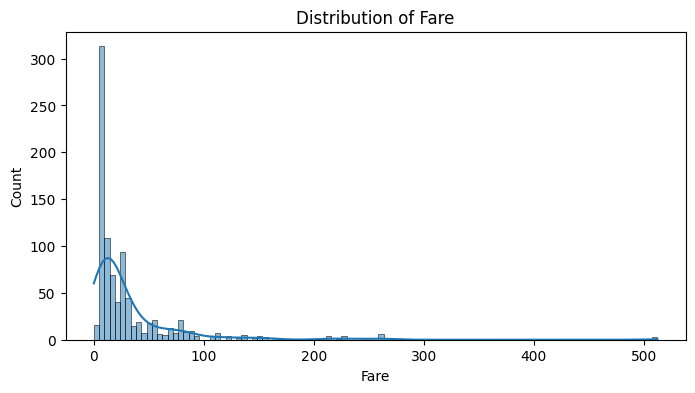

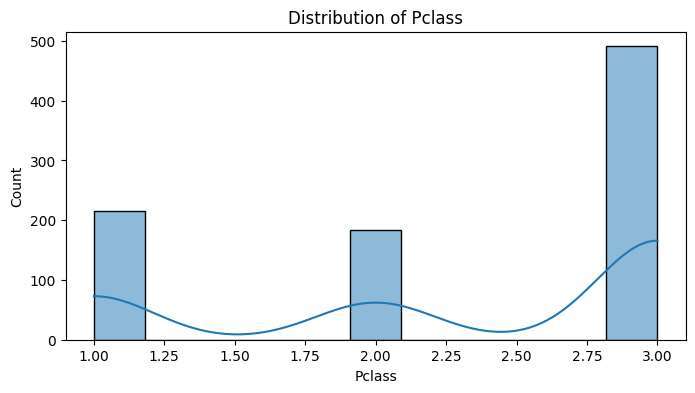

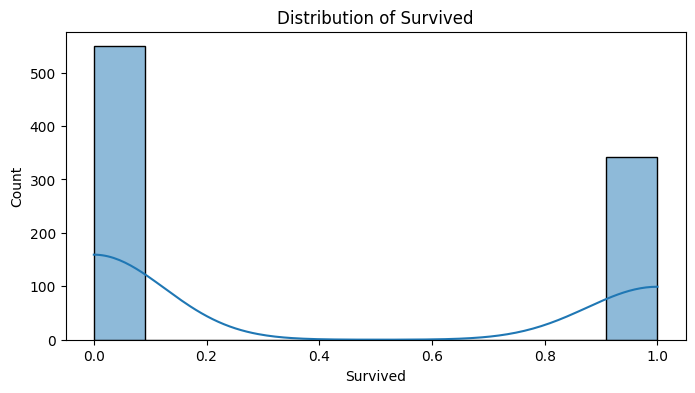

In [20]:
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare', 'Pclass', 'Survived']
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

In [21]:
df[numerical_features].corr()

,Age,SibSp,Parch,Fare,Pclass,Survived
Age,1.000000,-0.308247,-0.189119,0.096067,-0.369226,-0.077221
SibSp,-0.308247,1.000000,0.414838,0.159651,0.083081,-0.035322
Parch,-0.189119,0.414838,1.000000,0.216225,0.018443,0.081629
Fare,0.096067,0.159651,0.216225,1.000000,-0.549500,0.257307
Pclass,-0.369226,0.083081,0.018443,-0.549500,1.000000,-0.338481
Survived,-0.077221,-0.035322,0.081629,0.257307,-0.338481,1.000000


<Axes: >

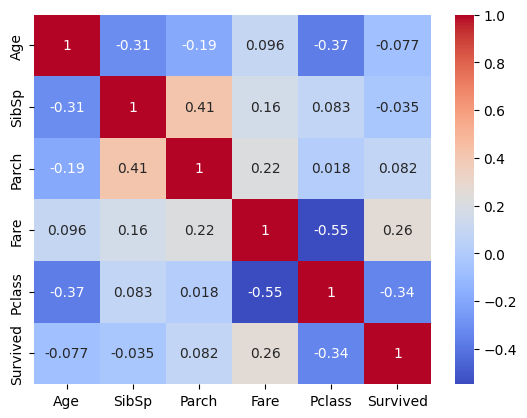

In [22]:
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')

Survived
0    549
1    342
Name: count, dtype: int64


Text(0.5, 1.0, 'Survival Counts')

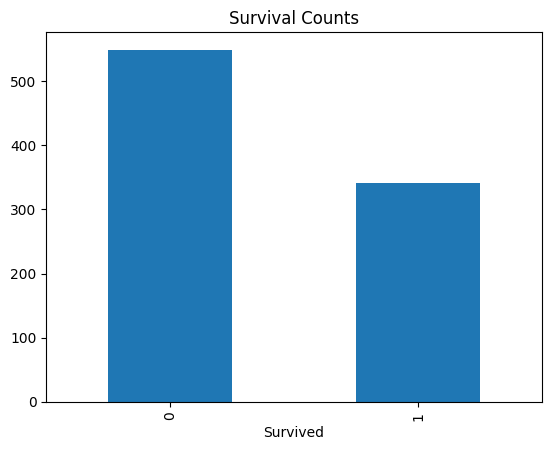

In [23]:
print(df['Survived'].value_counts())
df['Survived'].value_counts().plot(kind='bar')
plt.title('Survival Counts')

Text(0.5, 1.0, 'Survival Rate by Pclass')

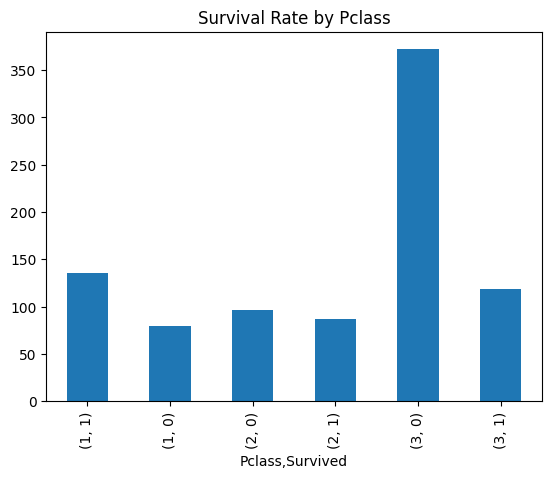

In [24]:
df.groupby('Pclass')['Survived'].value_counts().plot(kind='bar')
plt.title('Survival Rate by Pclass')

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64


Text(0.5, 1.0, 'Survival Counts by Sex')

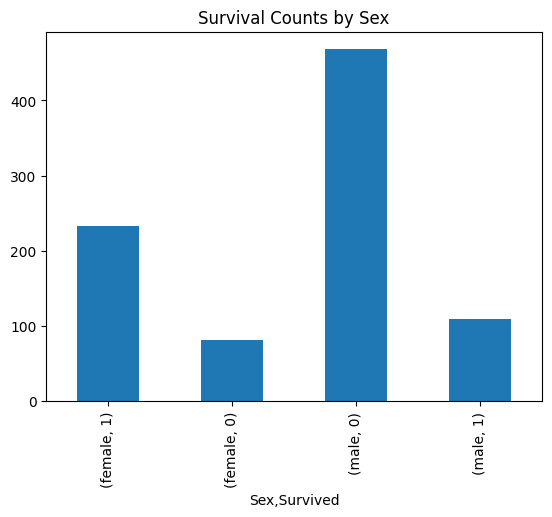

In [25]:
print(df.groupby('Sex')['Survived'].value_counts())
df.groupby('Sex')['Survived'].value_counts().plot(kind='bar', stacked=True)
plt.title('Survival Counts by Sex')

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: count, dtype: int64


Text(0.5, 1.0, 'Survival Rate by SibSp')

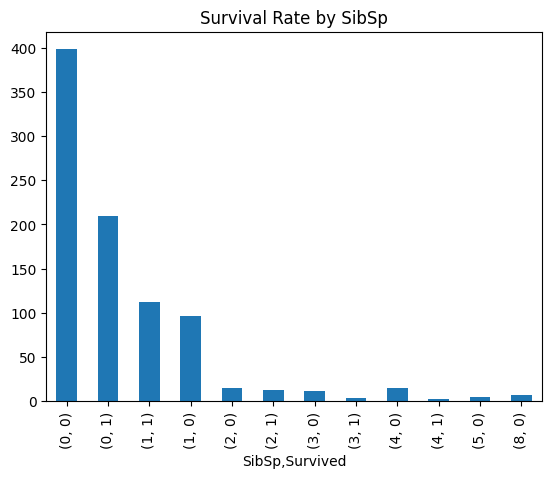

In [26]:
print(df.groupby('SibSp')['Survived'].value_counts())
df.groupby('SibSp')['Survived'].value_counts().plot(kind='bar')
plt.title('Survival Rate by SibSp')

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: count, dtype: int64


Text(0.5, 1.0, 'Survival Counts by Embarked')

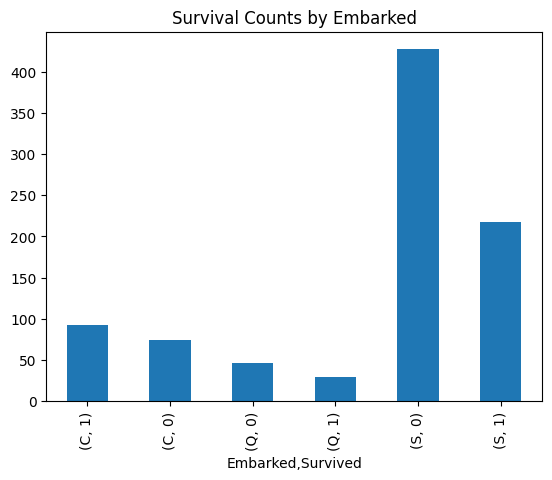

In [27]:
print(df.groupby('Embarked')['Survived'].value_counts())
df.groupby('Embarked')['Survived'].value_counts().plot(kind='bar', stacked=True)
plt.title('Survival Counts by Embarked')

In [28]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [30]:
df.dropna(inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = df.drop('Survived', axis=1)
y = df['Survived']
X = pd.get_dummies(X, drop_first=True)
best_score = 0
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    if score > best_score:
        best_score = score
        print(f'New best score: {best_score}')
        import pickle
        with open('best_titanic_model.pkl', 'wb') as f:
            pickle.dump(model, f)


New best score: 0.7972027972027972
New best score: 0.8041958041958042
New best score: 0.8251748251748252
New best score: 0.8531468531468531
New best score: 0.8601398601398601


In [ ]:
new_passenger = np.array([[3, 25, 0, 0, 7.25, 0, 1, 0]]) 

prediction = model.predict(new_passenger)
print(f'The New Passenger: {"Survived" if prediction[0] == 1 else "Did not survive"}')
    